    LaTeX генератор таблиц:

In [71]:
mass = input().split()
for elem in mass:
    print ("$"+elem+"$ & ", end = "")

203	472	695	922	1150
$203$ & $472$ & $695$ & $922$ & $1150$ & 

    Теперь основная часть:

In [1]:
import matplotlib.pyplot as plt
from math  import sqrt 
from math  import log
from numpy import exp
import numpy as np

    Считаем по МНК:

In [2]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

In [6]:
class Plot:
    
    def __init__(self):
        
        self.f = list (map (float, input().split())) # frequency 
        self.n = list (range (len (self.f)))
        
        self.fn = self.f[0]
        self.f = [i_f - self.fn for i_f in self.f]
        
        self.k, self.b, self.sigma_k, self.sigma_b = MNK (self.n, self.f)
        
        print ("f:", *self.f, sep = '\t')
        print ("n:", *self.n, sep = '\t')
        print ("k = ", self.k, " b = ", self.b)
        print ("Eps k = ", self.sigma_k / self.k, "\nEps b = ", self.sigma_b / self.b, sep = '\t')

In [8]:
def CreatePlot (obj, num, path_name, t):

    fig = plt.figure(figsize = (7, 7))
    ax  = fig.add_subplot(1,1,1)

    const_start = 0
    const_end   = obj.n[-1]

    ax.scatter (obj.n, obj.f, marker = "+", s = 300, linewidths = 3, color = "red");
    ax.plot ([const_start, const_end], [obj.k * const_start + obj.b, obj.k * const_end + obj.b], color = "blue", linewidth = 3, alpha = 0.5);

    ax.set_title("График $f (k)$ при $t = $" + str (t[num]) + "$^o С$", fontsize = 20)
    ax.set_xlabel('$k$', fontsize = 20)
    ax.set_ylabel('$f$, Гц', fontsize = 20)

    ax.grid(True)

    plt.savefig ("Picturies/" + path_name + "/" + path_name + str(num) + ".pdf")

195	450	660	870	1100
f:	0.0	255.0	465.0	675.0	905.0
n:	0	1	2	3	4
k =  223.0  b =  14.0
Eps k = 	0.01566300376374258	
Eps b = 	0.352831115292242

220	460	660	880	1110
f:	0.0	240.0	440.0	660.0	890.0
n:	0	1	2	3	4
k =  220.0  b =  6.0
Eps k = 	0.01149919149152138	
Eps b = 	0.5962847939999439

207	465	675	895	1115
f:	0.0	258.0	468.0	688.0	908.0
n:	0	1	2	3	4
k =  224.60000000000002  b =  15.199999999999932
Eps k = 	0.015520800923583718	
Eps b = 	0.3243361000831992

205	470	690	910	1135
f:	0.0	265.0	485.0	705.0	930.0
n:	0	1	2	3	4
k =  230.0  b =  17.0
Eps k = 	0.016613020151776348	
Eps b = 	0.317864849084854

203	472	695	922	1150
f:	0.0	269.0	492.0	719.0	947.0
n:	0	1	2	3	4
k =  234.39999999999998  b =  16.600000000000023
Eps k = 	0.01591245458454765	
Eps b = 	0.31776180538048976



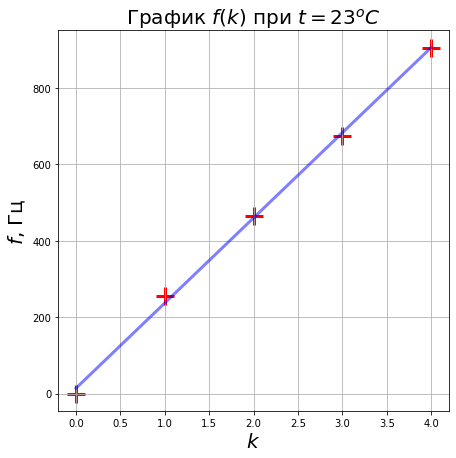

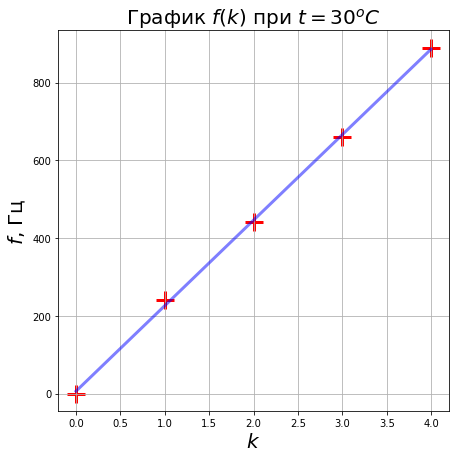

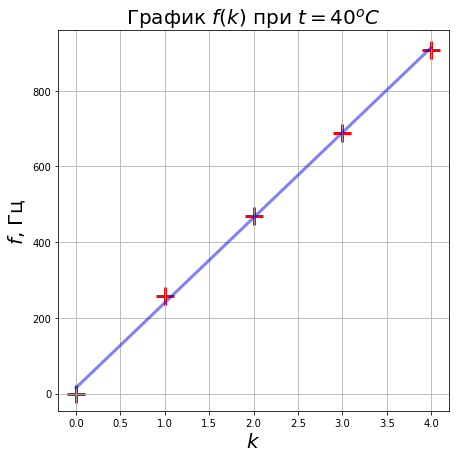

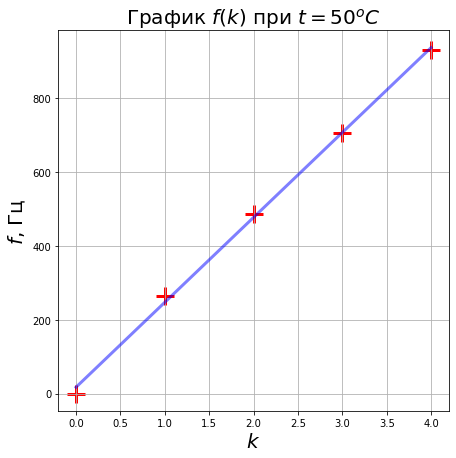

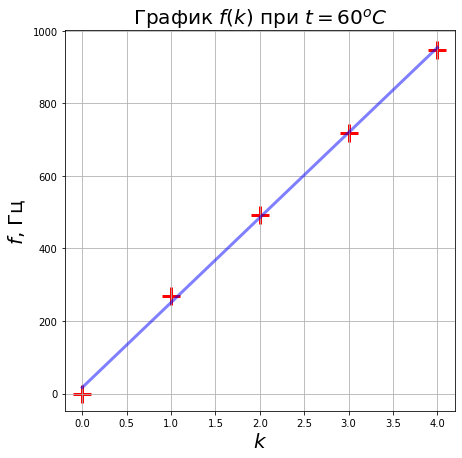

In [10]:
f = [23, 30, 40, 50, 60] 

for i in range (len (f)):
    new_obj = Plot ()
    CreatePlot (new_obj, i, "work2_", f)
    print() # newline